### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sweetviz as sv
import plotly.express as px

In [2]:
# !pip install ydata-profiling
# !pip install sweetviz 

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
data = pd.read_csv('data/coupons.csv')
pd.set_option('display.max_columns', 100)

In [4]:
data.head(4)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


In [5]:
data.shape


(12684, 26)

2. Investigate the dataset for missing or problematic data.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [7]:
data.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [8]:
# finding the percentage value missing data...

( data.isnull().sum() / data.shape[0] ) * 100

destination              0.000000
passanger                0.000000
weather                  0.000000
temperature              0.000000
time                     0.000000
coupon                   0.000000
expiration               0.000000
gender                   0.000000
age                      0.000000
maritalStatus            0.000000
has_children             0.000000
education                0.000000
occupation               0.000000
income                   0.000000
car                     99.148534
Bar                      0.843582
CoffeeHouse              1.710817
CarryAway                1.190476
RestaurantLessThan20     1.024913
Restaurant20To50         1.490066
toCoupon_GEQ5min         0.000000
toCoupon_GEQ15min        0.000000
toCoupon_GEQ25min        0.000000
direction_same           0.000000
direction_opp            0.000000
Y                        0.000000
dtype: float64

In [9]:
# filling NaN with "never"...

data["CarryAway"].fillna("never", inplace=True)
data[["Bar", "CoffeeHouse", "RestaurantLessThan20", "Restaurant20To50"]] = data[["Bar", "CoffeeHouse", "RestaurantLessThan20", "Restaurant20To50"]].replace(np.nan, "never")




In [10]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,never,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,never,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,never,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,never,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,never,4~8,1~3,1,1,0,0,1,0


In [11]:
# checking for duplicate...

data.duplicated().value_counts()

False    12610
True        74
dtype: int64

In [12]:
# there are 74 duplicates, dropping the duplicates...

data = data.drop_duplicates()

In [13]:
# duplicates are removed...

data.duplicated().value_counts()

False    12610
dtype: int64

In [14]:
# dropping car column since almost 99% of it was NaN...

data.drop("car", inplace=True, axis=1)

In [15]:
# added another column for acceptance Accepted for 1 and Rejected for 0 this correlate with Y column
# i did this to reflect that in the plot, instead of showing 0,1 in the plot 


data["acceptance"] = np.where(data["Y"] == 1, "Accepted", "Rejected")

# <li> Consolidating and Dropping Columns </li>

***"toCoupon_GEQ5min", "toCoupon_GEQ15min", "toCoupon_GEQ25min" are consolicated to one column "distance"***

In [16]:

# consolidating 5min, 15min and 25min into a new col "distance"...

"""
  -----------------------------------------
  | 5 |   15   |   25   |  distance       |
  |----------------------------------------
  | 1 |   0    |    0   |  within 5 min   |
  | 1 |   1    |    0   |  within 15 min  |
  | 1 |   1    |    1   |  within 25 min  |
  -----------------------------------------

"""


def consolidating_distance_col(cols):
    five_min, fifteen_min, twenty_five_min = list(map(int, cols))
    if five_min == 1:
        if fifteen_min == 1:
            if twenty_five_min == 1:
                return "within 25 min"
            return "within 15 min"
        return "within 5 min"



data["distance"] = data[["toCoupon_GEQ5min", "toCoupon_GEQ15min", "toCoupon_GEQ25min"]].apply(consolidating_distance_col, axis=1, raw=True)



In [17]:
# dropping the redundant columns for distance...

data.drop(["toCoupon_GEQ5min", "toCoupon_GEQ15min", "toCoupon_GEQ25min"], axis=1, inplace=True)

***"direction_same", "direction_opp" columns are consolicated to one column "dir"***

In [18]:
# consolidating direction columns into new column "dir"...


def consolidating_dir(col):
    same, op = list(map(int, col))
    if same == 1:
        return "same"
    return "oposite"

data["dir"] = data[["direction_same", "direction_opp"]].apply(consolidating_dir, axis=1, raw=True)

In [19]:
# dropping the redundant columns for direction

data.drop(["direction_same", "direction_opp"], axis=1, inplace=True)

***Rename temp column to low medium and high***

In [20]:
# categorizing temperature column to "temp_dir"...

def categorizing_temp(col):
    temp = "".join(list(map(str, col)))
    
    if temp == "30":
        return "Low"
    elif temp == "55":
        return "Medium"
    elif temp == "80":
        return "High"
    


data["temp_cat"] = data[["temperature"]].apply(categorizing_temp, axis=1, raw=True)

4. What proportion of the total observations chose to accept the coupon? 



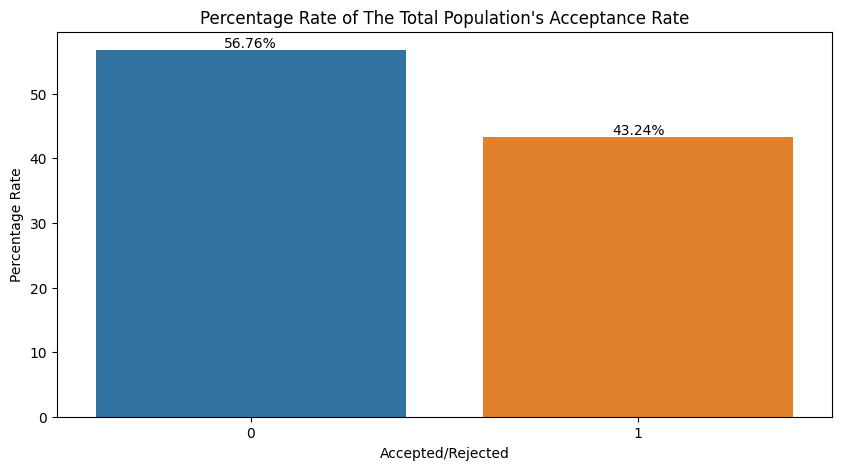

In [21]:

# counting the values of Accepted/Rejected in acceptance columns and reset the index to turn it back to DF...
population_acceptance_rate = data["acceptance"].value_counts().reset_index()

# getting the percentage rate of total acceptance  and rouding it to two decimal ...
pop_percentage = round(population_acceptance_rate["acceptance"] / data.shape[0] * 100, 2).reset_index()


# renaming the columns for more readability...
pop_percentage.rename(columns={"index": "Acceptance", "acceptance": "AcceptancePercentage"}, inplace=True)


# increasing the size of the plot 
plt.figure(figsize=(10, 5))

# bar plot the total population's acceptance
total_pop_plt = sns.barplot(data=pop_percentage, x="Acceptance", y="AcceptancePercentage")

total_pop_plt.set(
    title="Percentage Rate of The Total Population's Acceptance Rate",
    xlabel="Accepted/Rejected",
    ylabel="Percentage Rate"
);



for i in total_pop_plt.containers:
    labels = list(map(lambda x: str(round(x, 2)) + "%", i.datavalues))
    total_pop_plt.bar_label(i, labels=labels)

5. Use a bar plot to visualize the `coupon` column.

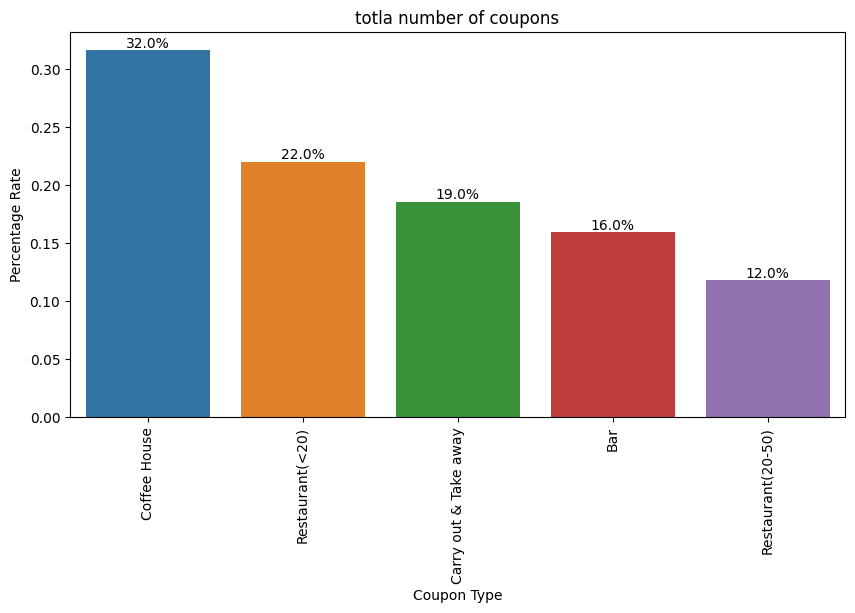

In [22]:
# get the count of different coupons...

coupon_col = data["coupon"].value_counts(normalize=True).reset_index()

# renaming the columns for readability
coupon_col.rename(columns={"index": "coupon", "coupon": "count"}, inplace=True)


# increasing the size of the plot
plt.figure(figsize=(10, 5))


# bar plot of the counts of all coupons
coupon_col_plt = sns.barplot(data=coupon_col, x="coupon", y="count")

coupon_col_plt.set(
    title="totla number of coupons",
    xlabel="Coupon Type",
    ylabel="Percentage Rate",
)


plt.xticks(rotation=90);


# adding label to the bars 

# inspired by "Bryan Walsh" research

for i in coupon_col_plt.containers:
    labels = list(map(lambda x: str(round(x, 2) * 100) + "%", i.datavalues))
    coupon_col_plt.bar_label(i, labels=labels)


6. Use a histogram to visualize the temperature column.

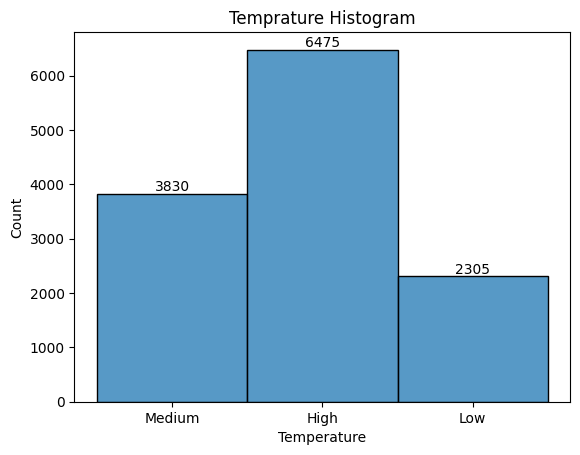

In [23]:
# histogram of Temperat

temp_plt = sns.histplot(data=data["temp_cat"])

temp_plt.set(title="Temprature Histogram", xlabel="Temperature")


for i in temp_plt.containers:
    temp_plt.bar_label(i,)


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [24]:
bar_coupons = data.query("coupon == 'Bar'").copy()

2. What proportion of bar coupons were accepted?


In [25]:

bar_coupons["acceptance"].value_counts(normalize=True)

Rejected    0.59005
Accepted    0.40995
Name: acceptance, dtype: float64

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [26]:
# function to create column based on a condition 

def create_bar_visit_3orless_col(col):
    visit = "".join(list(map(str, col)))
    
    if visit == "1~3" or visit == "less1":
        return "3 or less"
    elif visit == "never":
        return "never"
    else:
        return "more than 3"

In [27]:
# ccreating new column "bar_visit_3orless" which indicates Bar visit as never or 3 or less 

bar_coupons["bar_visit_3orless"] = bar_coupons[["Bar"]].apply(create_bar_visit_3orless_col, axis=1, raw=True)

In [28]:
# groupby bar_visit_3orless and normalizing the data 


bar_comp = bar_coupons.groupby("bar_visit_3orless")[["acceptance"]]\
    .value_counts(normalize=True)\
    .reset_index().rename(columns={0: "count"})
bar_comp

,bar_visit_3orless,acceptance,count
0,3 or less,Accepted,0.528125
1,3 or less,Rejected,0.471875
2,more than 3,Accepted,0.768844
3,more than 3,Rejected,0.231156
4,never,Rejected,0.807286
5,never,Accepted,0.192714


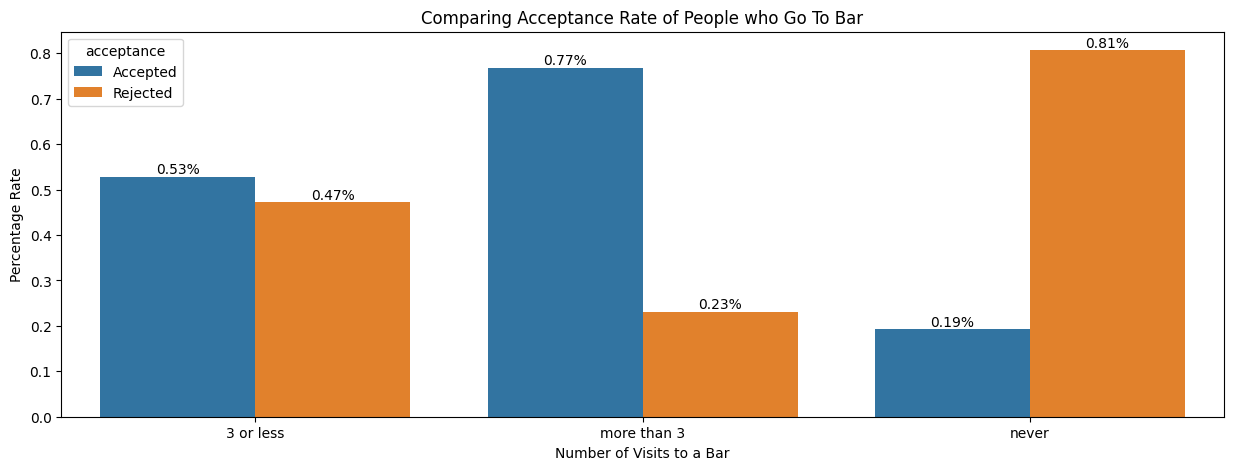

In [29]:
# plotting

plt.figure(figsize=(15, 5))

bar_comp_plt = sns.barplot(
    data=bar_comp, 
    x="bar_visit_3orless", 
    y="count", 
    hue="acceptance")

bar_comp_plt.set(title="Comparing Acceptance Rate of People who Go To Bar", 
                          xlabel="Number of Visits to a Bar", 
                          ylabel="Percentage Rate"
                         );


# lableling the bars with their values 
for i in bar_comp_plt.containers:
    labels = list(map(lambda x: str(round(x, 2)) + "%", i.datavalues))
    bar_comp_plt.bar_label(i, labels=labels)

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [30]:
# function to consolidate age to more than 21 and less than 21

def create_age_col(col):
    age = "".join(list(map(str, col)))
    if "21" in age:
        return "less than 25"
    return "more than 25"


def create_bar_visit_col(col):
    visit = "".join(list(map(str, col)))
    
    if visit == "less1" or visit == "never":
        return "never"
    return "more than once"


In [31]:

# adding two new columns age_comp and bar_visit based on the conditions defined above 

bar_coupons["age_comp"] = bar_coupons[["age"]].apply(create_age_col, axis=1,raw=True)
bar_coupons["bar_visit"] = bar_coupons[["Bar"]].apply(create_bar_visit_col, axis=1, raw=True)


In [32]:
# groupby age_comp which was created above
bar_coupons_per_age_visit = bar_coupons.groupby("age_comp")[["bar_visit", "acceptance"]].value_counts(normalize=True).reset_index()

# concatenating age_comp with bar_visit column 
bar_coupons_per_age_visit["bar_visit_age"] = bar_coupons_per_age_visit["age_comp"] + " & " + bar_coupons_per_age_visit["bar_visit"] 



In [33]:
bar_coupons_per_age_visit

,age_comp,bar_visit,acceptance,0,bar_visit_age
0,less than 25,never,Rejected,0.394841,less than 25 & never
1,less than 25,never,Accepted,0.255952,less than 25 & never
2,less than 25,more than once,Accepted,0.234127,less than 25 & more than once
3,less than 25,more than once,Rejected,0.115079,less than 25 & more than once
4,more than 25,never,Rejected,0.531873,more than 25 & never
5,more than 25,more than once,Accepted,0.193891,more than 25 & more than once
6,more than 25,never,Accepted,0.189243,more than 25 & never
7,more than 25,more than once,Rejected,0.084993,more than 25 & more than once


In [34]:
# renaming column 0 to count for readability 

bar_coupons_per_age_visit.rename(columns={0: "count"}, inplace=True)


In [35]:
# sorting by acceptance so plot shows the order Accepted/Rejected properly

bar_coupons_per_age_visit.sort_values(by="acceptance", ascending=True, inplace=True)

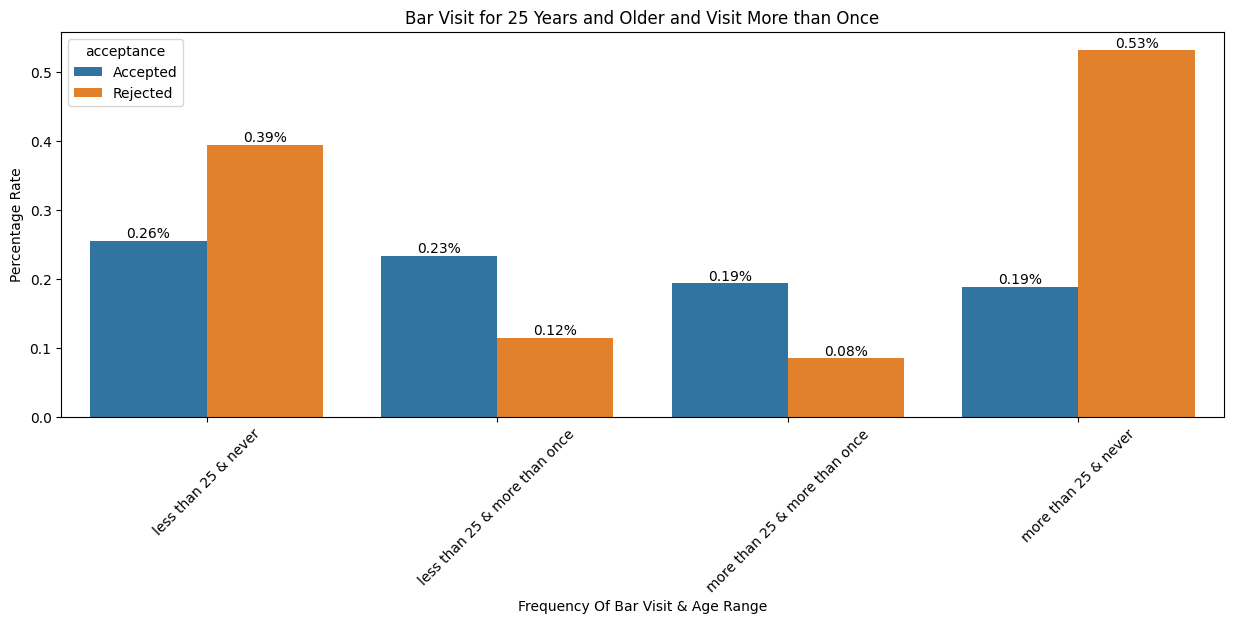

In [36]:
# plotting 

plt.figure(figsize=(15,5))

age_visit_barplt = sns.barplot(data=bar_coupons_per_age_visit, x="bar_visit_age", y="count", hue="acceptance");

age_visit_barplt.set(
    title="Bar Visit for 25 Years and Older and Visit More than Once",
    xlabel="Frequency Of Bar Visit & Age Range",
    ylabel="Percentage Rate"
);

plt.xticks(rotation=45);


# adding bar lables to each bar
for i in age_visit_barplt.containers:
    labels = list(map(lambda x: str(round(x, 2)) + "%", i.datavalues))
    age_visit_barplt.bar_label(i, labels=labels)

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [37]:
bar_coupons["occupation"].value_counts()

Unemployed                                   301
Student                                      251
Computer & Mathematical                      229
Sales & Related                              178
Education&Training&Library                   140
Management                                   115
Office & Administrative Support              105
Arts Design Entertainment Sports & Media     100
Business & Financial                          89
Retired                                       75
Food Preparation & Serving Related            48
Community & Social Services                   44
Healthcare Support                            44
Healthcare Practitioners & Technical          41
Transportation & Material Moving              35
Legal                                         34
Architecture & Engineering                    27
Personal Care & Service                       27
Protective Service                            27
Construction & Extraction                     24
Life Physical Social

In [38]:
# filter for more than once visit and removing Farming, Fishing and Forestry

bar_more_then_once = bar_coupons.query("bar_visit == 'more than once' & occupation != 'Farming Fishing & Forestry'").copy()



In [39]:
# combining bar_visit and passanger together 

def create_new_col(col):
    visit, passanger = list(map(str, col))
    if visit == "more than once":
        if "Kid" in passanger:
            return "more than once & with Kid"
        else:
            return "more than once & without Kid"
        
    elif visit == "never":
        if "Kid" in passanger:
            return "never & with Kid"
        else:
            return "never & without Kid"

In [40]:
# adding the new column visit_passanger which is the combination of bar_visit and passanger

bar_coupons["visit_passanger"] = bar_coupons[["bar_visit", "passanger"]].apply(create_new_col, axis=1, raw=True)

In [41]:
bar_coupons["visit_passanger"].value_counts()

never & without Kid             1255
more than once & without Kid     551
never & with Kid                 159
more than once & with Kid         45
Name: visit_passanger, dtype: int64

In [42]:
# groupby visit_passanger 
grp_by_visit_passanger = bar_coupons.groupby("visit_passanger")[["acceptance", "visit_passanger"]]

# count the values and normalizing it 
df_visit_passanger = grp_by_visit_passanger.value_counts(normalize=True).reset_index().rename(columns={0: "count"})


# if plot sees "Rejected" first in the table, it will choose that as a blue color, so to ensure the plot coloring
# stays uniform across, I am sorting the DF by "acceptance"

df_visit_passanger.sort_values(by="acceptance", ascending=True, inplace=True)


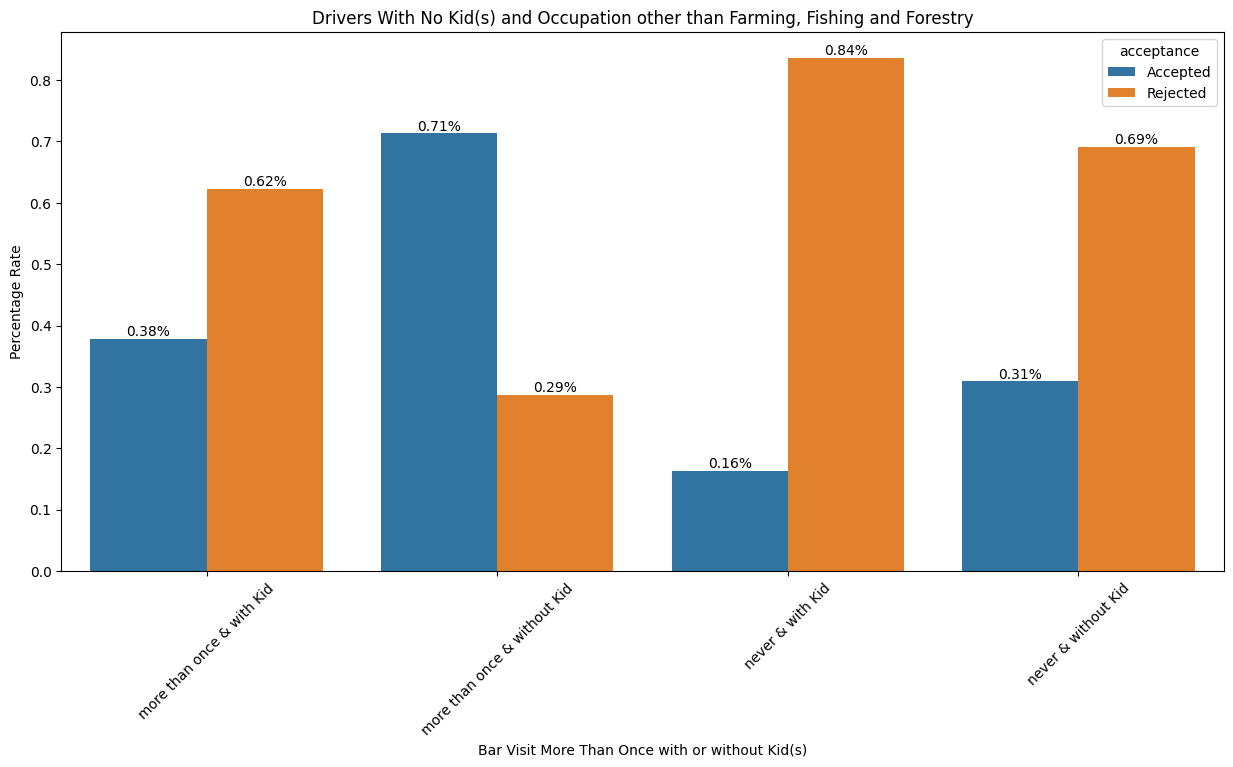

In [43]:
# plotting 

plt.figure(figsize=(15, 7))

visit_passanger_plt = sns.barplot(data=df_visit_passanger, x="visit_passanger", y="count", hue="acceptance");

visit_passanger_plt.set(
    title="Drivers With No Kid(s) and Occupation other than Farming, Fishing and Forestry",
    xlabel="Bar Visit More Than Once with or without Kid(s)",
    ylabel="Percentage Rate"
)
plt.xticks(rotation=45); 


# labeling the bar with their values 

for i in visit_passanger_plt.containers:
    labels = list(map(lambda x: str(round(x, 2)) + "%", i.datavalues))
    visit_passanger_plt.bar_label(i, labels=labels)

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



<hr>


**1. go to bars more than once a month, had passengers that were not a kid, and were not widowed OR**

<hr>

In [44]:
# creating a new column combining two features "age, bar_visit"

def creating_col_for_age(col):
    age, visit = list(map(str, col))
    
    if age == "21" or age == "26" or age == "below21":
        if visit == "more than once":
            return "under 30 & more than once"
        return "under 30 & never"
    
    elif age != "21" or age != "26" or age != "below21":
        if visit == "more than once":
            return "above 30 & more than once"
        return "above 30 & never"

In [45]:
# creating a new column combining two features "age, bar_visit"

bar_coupons["age_30_visit"] = bar_coupons[["age", "bar_visit"]].apply(creating_col_for_age, axis=1, raw=True).copy()

In [46]:
bar_coupons["maritalStatus"].value_counts(normalize=True)

Married partner      0.435323
Single               0.328856
Unmarried partner    0.188060
Divorced             0.037313
Widowed              0.010448
Name: maritalStatus, dtype: float64

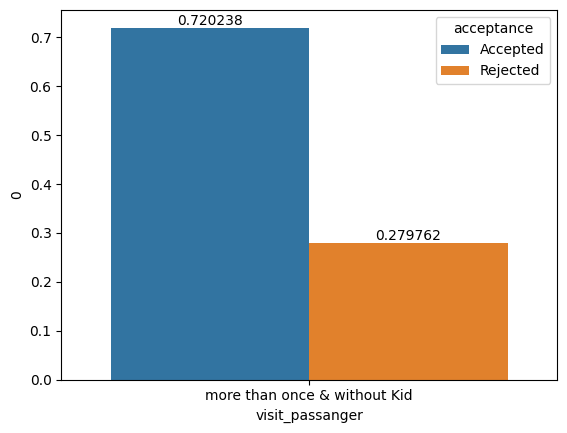

In [47]:
# filtering based on age under 30 and more than once visit with no Kid(s) as passanger and not Widowed

more_than_once_no_kids_no_widowed = bar_coupons.query(
            "age_30_visit == 'under 30 & more than once' & passanger != 'Kid(s)' & maritalStatus != 'Widowed'"
        )

# get the value counts and normalizing it 
more_than_once_no_kids_no_widowed_value_count = more_than_once_no_kids_no_widowed[["visit_passanger","acceptance"]].value_counts(normalize=True).reset_index()


# plotting 
more_than_once_no_kids_no_widowed_plt = sns.barplot(data=more_than_once_no_kids_no_widowed_value_count, x="visit_passanger", y=0, hue="acceptance");


# labeling the bars with their values

for i in more_than_once_no_kids_no_widowed_plt.containers:
    more_than_once_no_kids_no_widowed_plt.bar_label(i, )


<hr>

**2. go to bars more than once a month and are under the age of 30 OR**

<hr>

In [48]:
bar_coupons["age_30_visit"].value_counts(normalize=True)

above 30 & never             0.427861
under 30 & never             0.275622
under 30 & more than once    0.171642
above 30 & more than once    0.124876
Name: age_30_visit, dtype: float64

In [49]:
# filtering for only age under 30 and visit Bar more than once 

grpby_age_30_visit = bar_coupons.groupby("age_30_visit")

age_30_visit_normalized = grpby_age_30_visit[["age_30_visit", "acceptance"]].value_counts(normalize=True).reset_index()

# renaming the column 0 for readability 
age_30_visit_normalized = age_30_visit_normalized.rename(columns={0: "count"})

# sorting the values so accepted shows up first for coloring purpose in ploting  
age_30_visit_normalized.sort_values(by="acceptance", ascending=True, inplace=True)


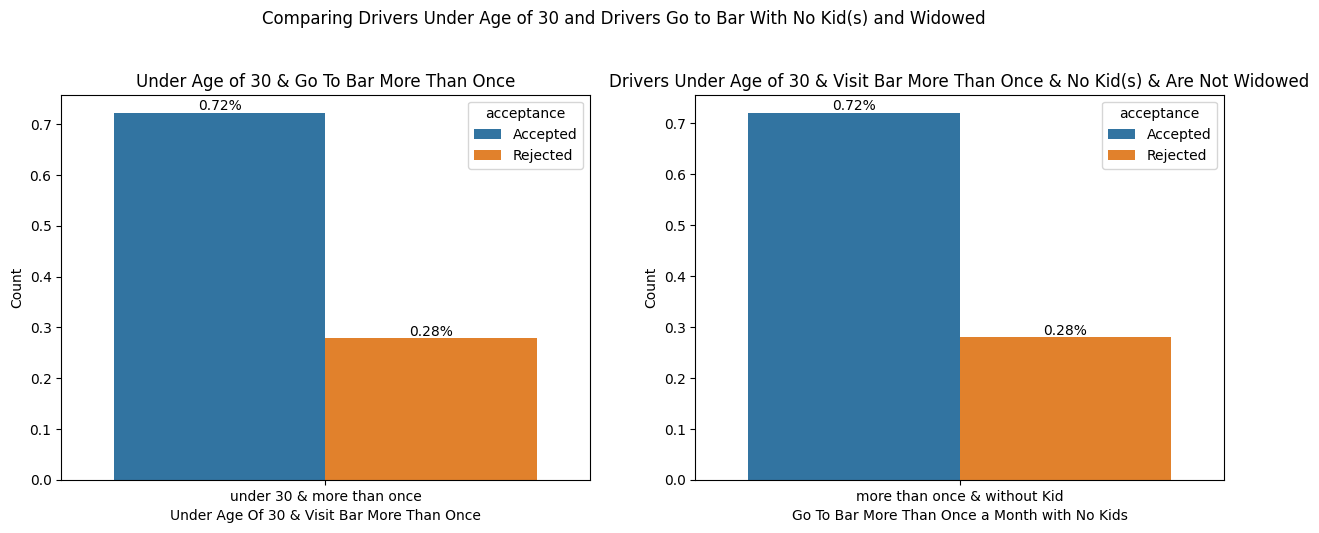

In [50]:
# Plot Code Block...


plt.figure(figsize=(15, 5))


plt.subplot(121)

age_more_30_barplt = sns.barplot(data=age_30_visit_normalized.query("age_30_visit == 'under 30 & more than once'"), x="age_30_visit", y="count", hue="acceptance")

age_more_30_barplt.set(title="Under Age of 30 & Go To Bar More Than Once");

plt.xlabel("Under Age Of 30 & Visit Bar More Than Once");
plt.ylabel("Count");


plt.subplot(122)
more_than_once_nokid_barplt = sns.barplot(data=more_than_once_no_kids_no_widowed_value_count, x="visit_passanger", y=0, hue="acceptance");

more_than_once_nokid_barplt.set_title("Drivers Under Age of 30 & Visit Bar More Than Once & No Kid(s) & Are Not Widowed")


plt.xlabel("Go To Bar More Than Once a Month with No Kids");
plt.ylabel("Count");

plt.suptitle("Comparing Drivers Under Age of 30 and Drivers Go to Bar With No Kid(s) and Widowed", y=1.05)


# idea and reasearch done by Bryan Walsh 
for i in age_more_30_barplt.containers:
    labels = list(map(lambda x: str(round(x, 2)) + "%", i.datavalues))
    age_more_30_barplt.bar_label(i, labels=labels)
    
    
for i in more_than_once_nokid_barplt.containers:
    labels = list(map(lambda x: str(round(x, 2)) + "%", i.datavalues))
    more_than_once_nokid_barplt.bar_label(i, labels=labels)    
    
    
    

# Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

## Different Coupon's Acceptance Rate

In [51]:
# Grouping by coupon and looking at the acceptance rate of each group

grpby_coupons = data.groupby("coupon")[["acceptance"]]

coupons_normalized = grpby_coupons.value_counts(normalize=True).reset_index().rename(columns={0: "Count"})

coupons_normalized.sort_values(by="acceptance", ascending=True, inplace=True)


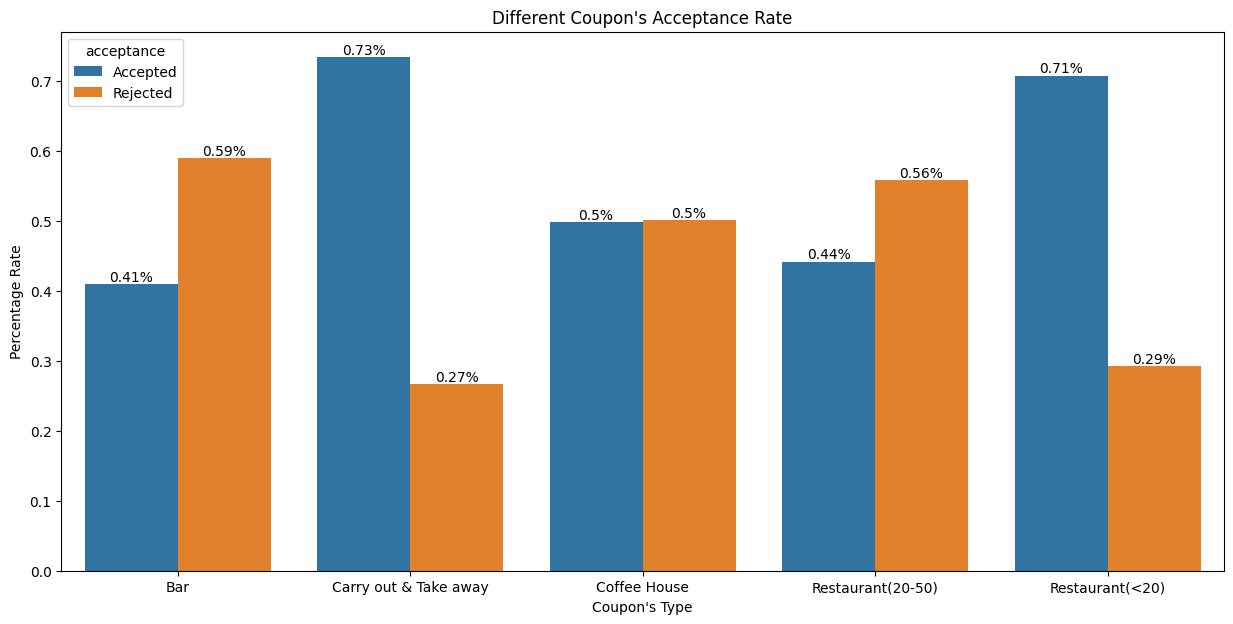

In [52]:
# plotting

plt.figure(figsize=(15,7))

coupons_plt = sns.barplot(data=coupons_normalized, 
           y="Count", x='coupon', hue="acceptance"
           )
coupons_plt.set(
    title="Different Coupon's Acceptance Rate",
    xlabel="Coupon's Type",
    ylabel="Percentage Rate"
);



# labeling the bars with their values 
for i in coupons_plt.containers:
    labels = list(map(lambda x: str(round(x, 2)) + "%", i.datavalues))
    coupons_plt.bar_label(i, labels=labels)    
    



## Creating New DataFrame for Carry out and Take Away 

In [53]:
take_aways = data.query("coupon == 'Carry out & Take away'")

- Lets look at the income level

In [54]:
take_aways["income"].value_counts()


$25000 - $37499     375
$12500 - $24999     338
$37500 - $49999     331
$100000 or More     317
$50000 - $62499     290
Less than $12500    204
$75000 - $87499     168
$87500 - $99999     167
$62500 - $74999     154
Name: income, dtype: int64

In [55]:
# lets create two category for income (below 50,000) and (above 50,000)

def create_income_cat(col):
    income = "".join(list(map(str, col)))
    if "25000" in income or "12500" in income or "37500" in income or "Less" in income:
        return "below 50k"
    return "above 50k"

In [56]:
take_aways["income_50k"] = take_aways[["income"]].apply(create_income_cat, axis=1, raw=True).copy()

/tmp/ipykernel_3107421/1888615531.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  take_aways["income_50k"] = take_aways[["income"]].apply(create_income_cat, axis=1, raw=True).copy()


In [57]:
# grouping by the income_50k and looking at their acceptance rate 

grpby_income = take_aways.groupby("income_50k")[["acceptance", "income_50k"]]

income_acceptance = grpby_income.value_counts(normalize=True).reset_index()
income_acceptance.rename(columns={0: "Percentage Rate"}, inplace=True)

income_acceptance

,income_50k,acceptance,Percentage Rate
0,above 50k,Accepted,0.717153
1,above 50k,Rejected,0.282847
2,below 50k,Accepted,0.748397
3,below 50k,Rejected,0.251603


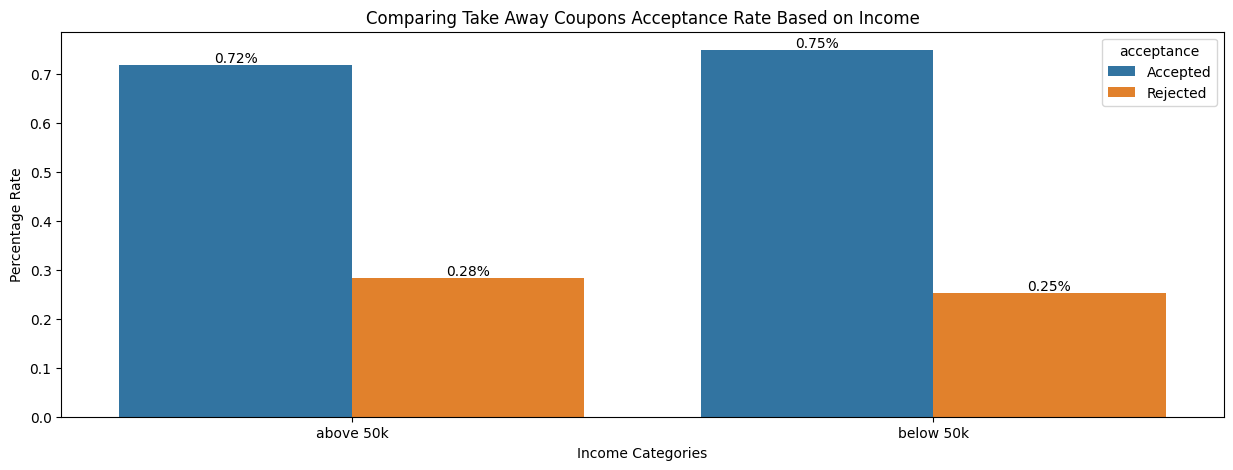

In [58]:
# plotting

plt.figure(figsize=(15, 5))

income_acceptance_plt = sns.barplot(data=income_acceptance, x="income_50k", y="Percentage Rate", hue="acceptance")

income_acceptance_plt.set(
    title="Comparing Take Away Coupons Acceptance Rate Based on Income",
    xlabel="Income Categories"
)


# labeling the bars with their values
for i in income_acceptance_plt.containers:
    labels = list(map(lambda x: str(round(x, 2)) + "%", i.datavalues))
    income_acceptance_plt.bar_label(i, labels=labels)


**Above plot indicates acceptance rate between above 50k or below 50k is almost the same**

lets add **marital status** to this

In [59]:
grpby_marrital = take_aways.groupby("maritalStatus")[["acceptance", "passanger"]]

marital_passanger = grpby_marrital.value_counts().reset_index()
marital_passanger["marital_passanger"] = marital_passanger["maritalStatus"] + " & " + marital_passanger["passanger"]


# sorting the count of coupons from bigger to smaller
marital_passanger.sort_values(by=0, ascending=False, inplace=True)


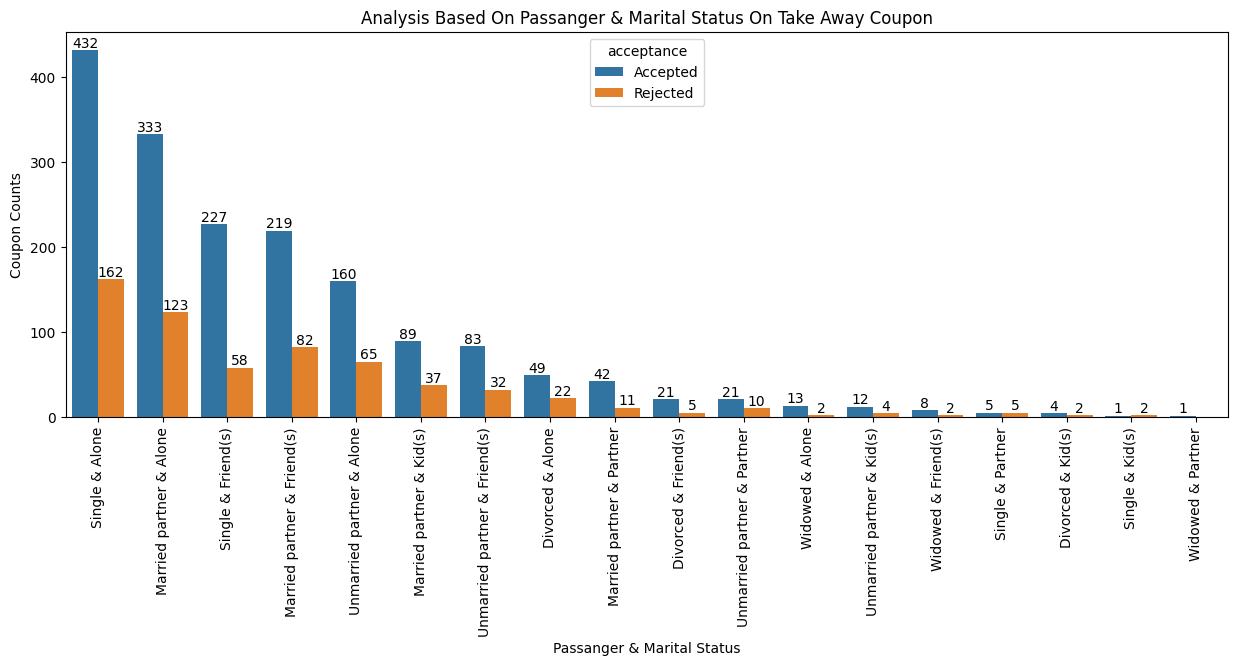

In [60]:
plt.figure(figsize=(15, 5))

marital_passanger_plt = sns.barplot(data=marital_passanger, x="marital_passanger", y=0, hue="acceptance")

marital_passanger_plt.set(
    title="Analysis Based On Passanger & Marital Status On Take Away Coupon",
    xlabel="Passanger & Marital Status",
    ylabel="Coupon Counts"
    
)
plt.xticks(rotation=90);

# adding label to the bars 
for i in marital_passanger_plt.containers:
    marital_passanger_plt.bar_label(i, )

## Adding Coupon Direction 

In [88]:
# adding "direction" to our analysis 

grpby_marrital_pass_dir = take_aways.groupby("maritalStatus")[["acceptance", "passanger", "dir"]]

marital_passanger_dir = grpby_marrital_pass_dir.value_counts().reset_index()

marital_passanger_dir["marital_passanger_dir"] = marital_passanger_dir["maritalStatus"] + " & " + marital_passanger_dir["passanger"] + " & " + marital_passanger_dir["dir"] 


# sorting the count of coupons from bigger to smaller
marital_passanger_dir.sort_values(by=0, ascending=False, inplace=True)

marital_status_list = [
    "Single & Alone & oposite", 
    "Single & Alone & same", 
    "Married partner & Alone & oposite",
    "Married partner & Alone & same"
]

# filtering the above results with Single/Married Alone on both oposite or same direction

filter_alone = marital_passanger_dir.query("marital_passanger_dir in @marital_status_list")



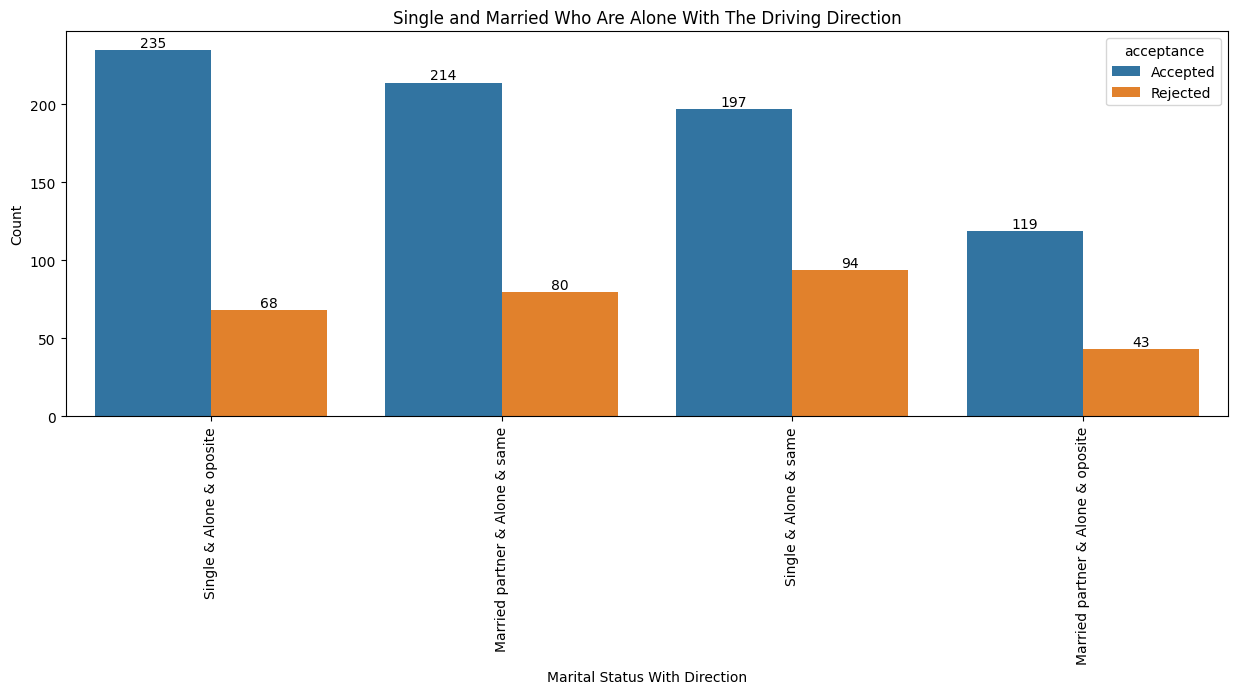

In [89]:
# plotting

plt.figure(figsize=(15,5))

filter_alone_plt = sns.barplot(data=filter_alone, x="marital_passanger_dir", y=0, hue="acceptance")

filter_alone_plt.set(
    title="Single and Married Who Are Alone With The Driving Direction",
    ylabel="Count",
    xlabel="Marital Status With Direction"
)
plt.xticks(rotation=90);

for label in filter_alone_plt.containers:
    filter_alone_plt.bar_label(label)



## Adding Weather Condition

In [86]:
# adding "weather" to our analysis 

grpby_marrital_pass_dir_weather = take_aways.groupby("maritalStatus")[["acceptance", "passanger", "dir", "weather"]]

marital_passanger_dir_weather = grpby_marrital_pass_dir_weather.value_counts().reset_index()

marital_passanger_dir_weather["marital_passanger_dir"] = marital_passanger_dir_weather["maritalStatus"] + \
        " & " + marital_passanger_dir_weather["passanger"] + " & " \
        + marital_passanger_dir_weather["dir"]


# sorting the count of coupons from bigger to smaller
marital_passanger_dir_weather.sort_values(by=0, ascending=False, inplace=True)

marital_status_list = [
    "Single & Alone & oposite", 
    "Single & Alone & same", 
    "Married partner & Alone & oposite",
    "Married partner & Alone & same"
]

# filtering the above results with Single/Married Alone on both oposite or same direction

filter_alone_weather = marital_passanger_dir_weather.query("marital_passanger_dir in @marital_status_list")
filter_alone_weather["marital_passanger_dir"] = filter_alone_weather["marital_passanger_dir"] + " & " + filter_alone_weather["weather"]


/tmp/ipykernel_3107421/2658526555.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_alone_weather["marital_passanger_dir"] = filter_alone_weather["marital_passanger_dir"] + " & " + filter_alone_weather["weather"]


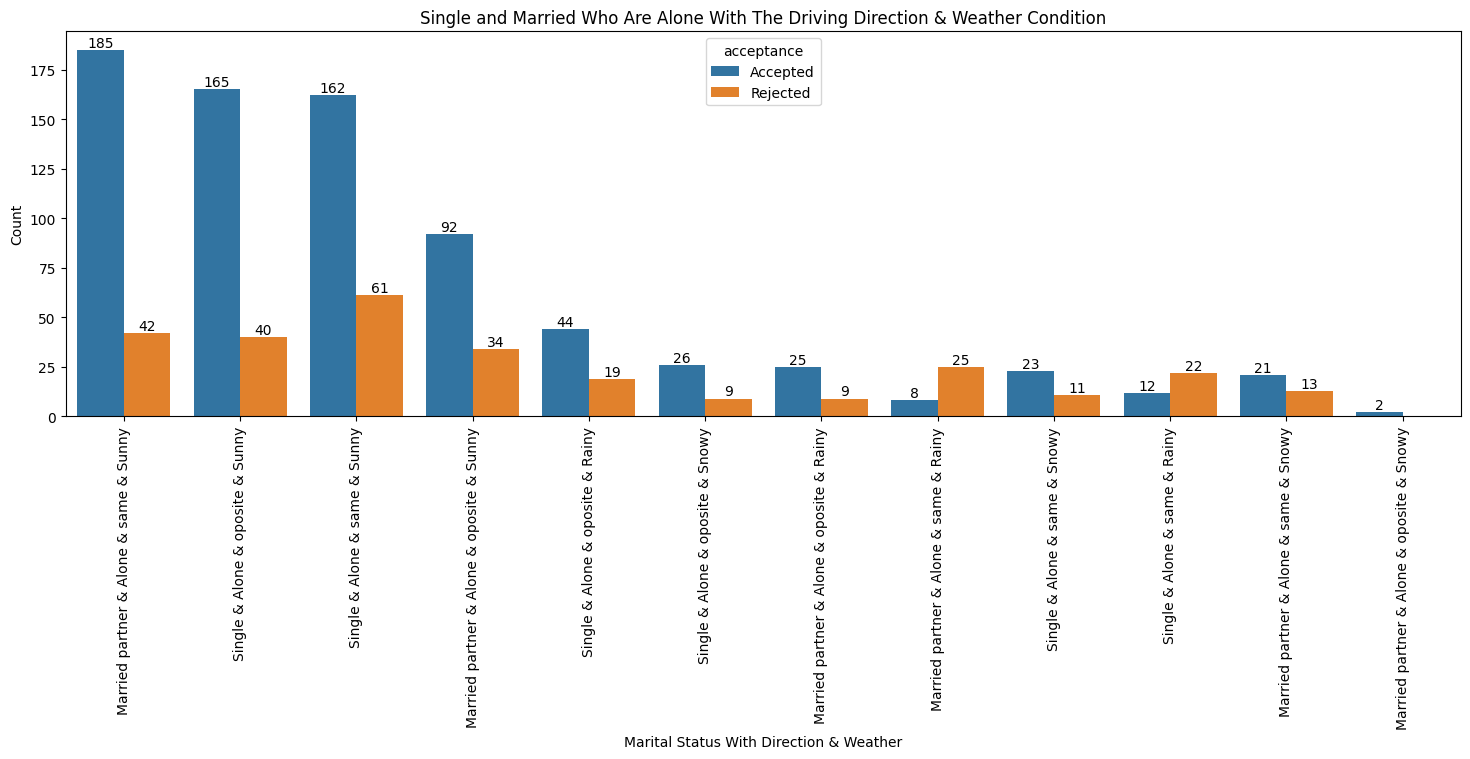

In [87]:
# plotting

plt.figure(figsize=(18,5))

filter_alone_weather_plt = sns.barplot(data=filter_alone_weather, x="marital_passanger_dir", y=0, hue="acceptance")

filter_alone_weather_plt.set(
    title="Single and Married Who Are Alone With The Driving Direction & Weather Condition",
    ylabel="Count",
    xlabel="Marital Status With Direction & Weather"
)
plt.xticks(rotation=90);

for label in filter_alone_weather_plt.containers:
    filter_alone_weather_plt.bar_label(label)

***above shows that Married drivers without any passanger who are going on the same direction as the coupon, and in a sunny day, are more likely to accept the coupon for Take Away. But on the other hand we can see the Single drivers are also alone in the car in a sunny day are willing to go to oposite direction***

## Passenger and destination on Acceptance Variable

1. concatenate destination with passenger and look at their acceptance rate 

In [65]:

# concatnating destination with passenger column 

data["passanger_dst"] = data["destination"].str.cat(data["passanger"], sep=" & ")

In [66]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,Y,acceptance,distance,dir,temp_cat,passanger_dst
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,never,4~8,1~3,1,Accepted,within 5 min,oposite,Medium,No Urgent Place & Alone
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,never,4~8,1~3,0,Rejected,within 5 min,oposite,High,No Urgent Place & Friend(s)
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,never,4~8,1~3,1,Accepted,within 15 min,oposite,High,No Urgent Place & Friend(s)
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,never,4~8,1~3,0,Rejected,within 15 min,oposite,High,No Urgent Place & Friend(s)
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,never,4~8,1~3,0,Rejected,within 15 min,oposite,High,No Urgent Place & Friend(s)


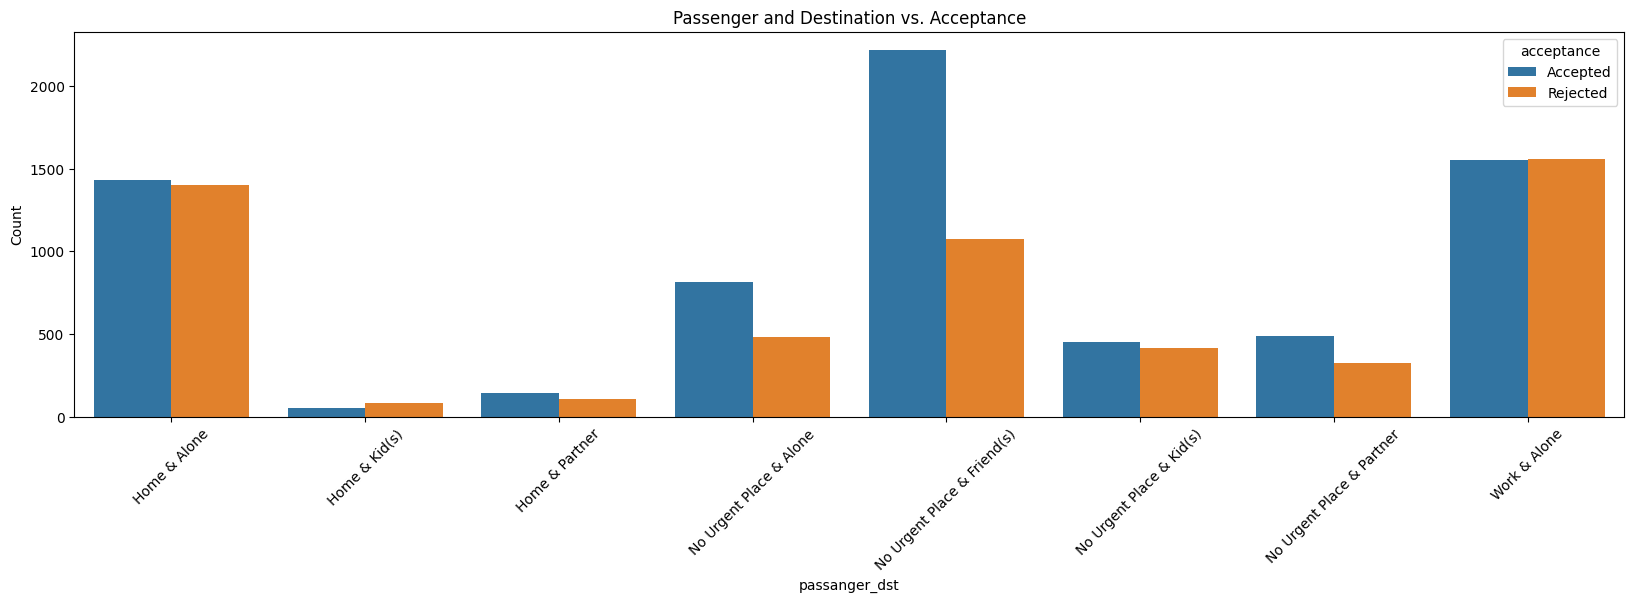

In [67]:
plt.figure(figsize=(20, 5))

sns.barplot(
    data=data.groupby("passanger_dst")[["acceptance"]]\
    .value_counts().reset_index()\
    .rename(columns={0: "Count"}), 
    x="passanger_dst", y="Count", hue="acceptance")\
.set(title="Passenger and Destination vs. Acceptance");

plt.xticks(rotation=45);



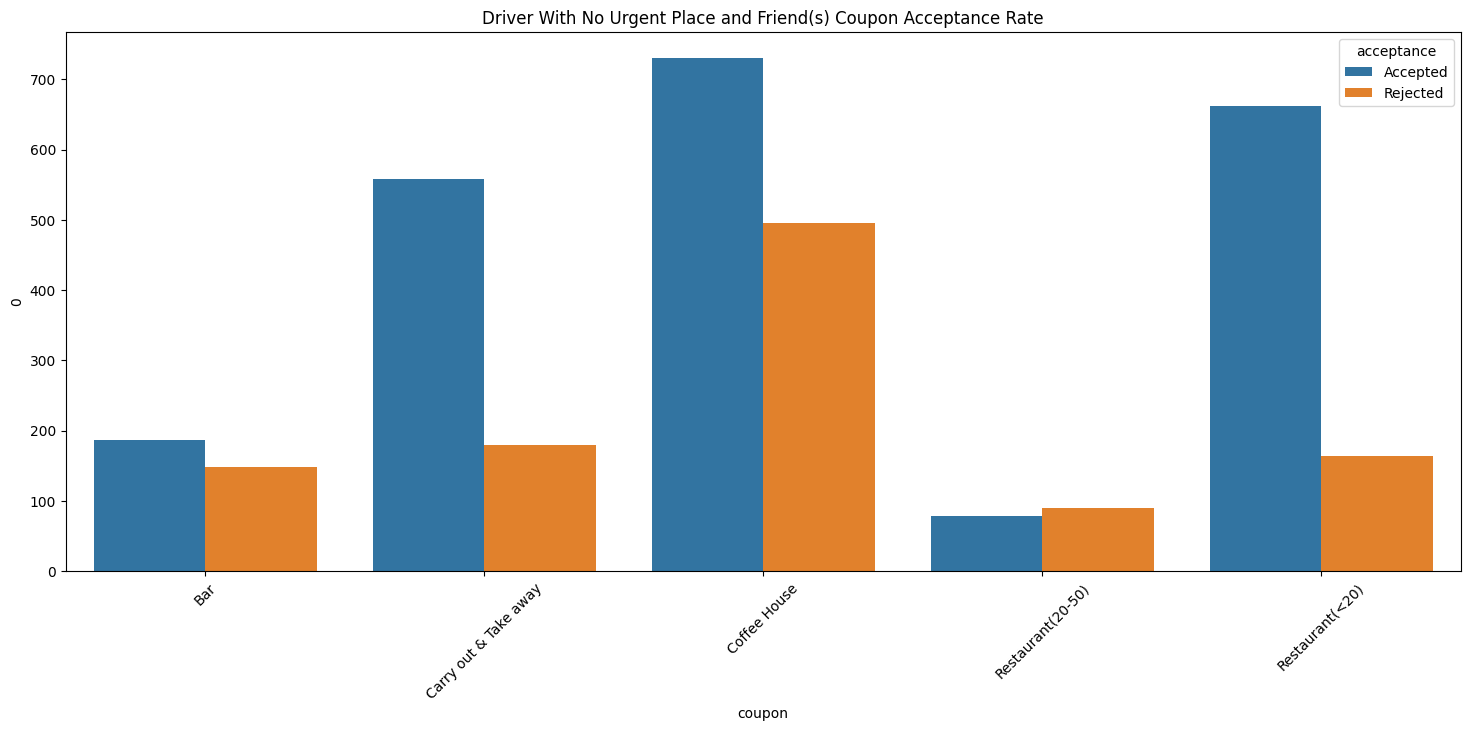

In [68]:
grp_psg_cpn = data.groupby(["passanger_dst", "coupon"])[["acceptance"]].value_counts().reset_index()


qry_no_urgent_friend = grp_psg_cpn.query("passanger_dst == 'No Urgent Place & Friend(s)'")


plt.figure(figsize=(18, 7))

bar_plt = sns.barplot(data=qry_no_urgent_friend, x="coupon", y=0, hue="acceptance");
plt.xticks(rotation=45);

bar_plt.set(title="Driver With No Urgent Place and Friend(s) Coupon Acceptance Rate");

In [69]:
data["psngr_dst_occ"] = data["passanger_dst"] + " & " + data["occupation"] 

In [70]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,Y,acceptance,distance,dir,temp_cat,passanger_dst,psngr_dst_occ
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,never,4~8,1~3,1,Accepted,within 5 min,oposite,Medium,No Urgent Place & Alone,No Urgent Place & Alone & Unemployed
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,never,4~8,1~3,0,Rejected,within 5 min,oposite,High,No Urgent Place & Friend(s),No Urgent Place & Friend(s) & Unemployed
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,never,4~8,1~3,1,Accepted,within 15 min,oposite,High,No Urgent Place & Friend(s),No Urgent Place & Friend(s) & Unemployed
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,never,4~8,1~3,0,Rejected,within 15 min,oposite,High,No Urgent Place & Friend(s),No Urgent Place & Friend(s) & Unemployed
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,never,4~8,1~3,0,Rejected,within 15 min,oposite,High,No Urgent Place & Friend(s),No Urgent Place & Friend(s) & Unemployed


In [71]:
a_ = data.groupby("psngr_dst_occ")[["acceptance"]].value_counts().reset_index()
b_ = a_.query('psngr_dst_occ == "No Urgent Place & Friend(s) & Unemployed"')


<AxesSubplot: xlabel='psngr_dst_occ', ylabel='0'>

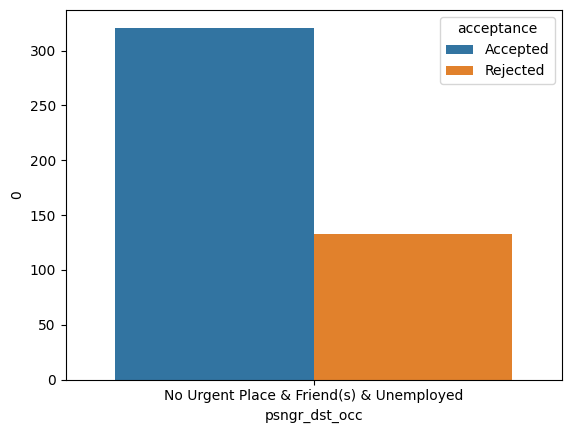

In [72]:

sns.barplot(data=b_, x="psngr_dst_occ", y=0, hue="acceptance")

## looking at occupation - Student and Unemployed on acceptance rate 

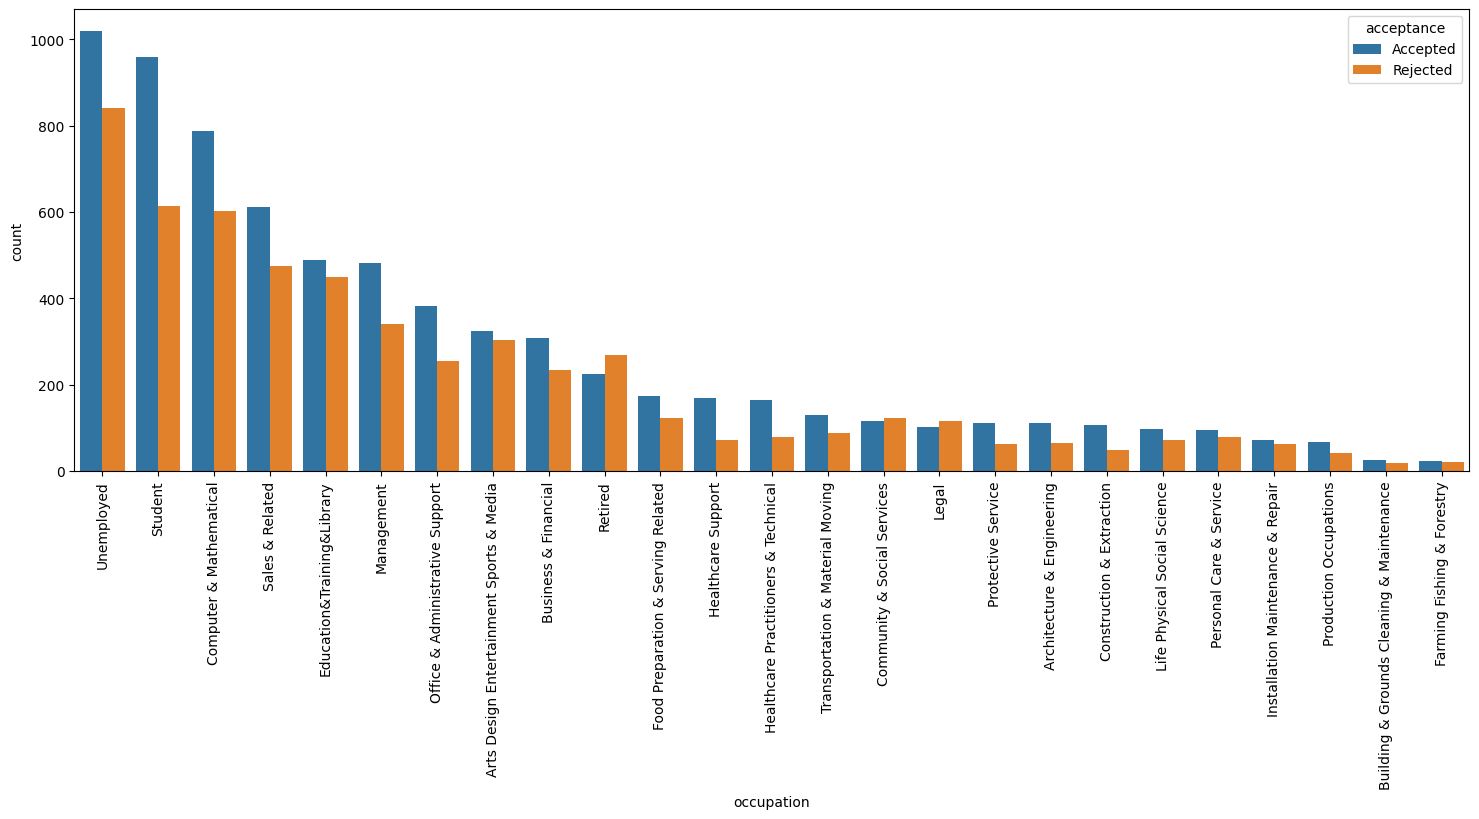

In [73]:
occupation = data[["occupation", "acceptance"]].value_counts().reset_index().rename(columns={0: "count"})


plt.figure(figsize=(18, 6))
sns.barplot(data=occupation, x="occupation", y="count", hue="acceptance");
plt.xticks(rotation=90);


In [74]:
student = data.query("occupation == 'Student'")["acceptance"]

In [75]:
student_count = student.count()
student_count

1575

In [76]:
student.value_counts().apply(lambda x: round(x / student_count * 100, 2))\
    .reset_index().rename(columns={"index": "acceptance", "acceptance": "percentage"})




,acceptance,percentage
0,Accepted,60.95
1,Rejected,39.05


In [77]:
unemployed = data.query("occupation == 'Unemployed'")["acceptance"]
unemployed_count = unemployed.count()

In [78]:
unemployed.value_counts().apply(lambda x: round(x / unemployed_count * 100, 2))\
    .reset_index().rename(columns={"index": "acceptance", "acceptance": "percentage"})

,acceptance,percentage
0,Accepted,54.76
1,Rejected,45.24


## looking at temperature on acceptace rate

In [79]:
data.groupby("temp_cat")[["acceptance"]].value_counts().reset_index()

,temp_cat,acceptance,0
0,High,Accepted,3876
1,High,Rejected,2599
2,Low,Accepted,1225
3,Low,Rejected,1080
4,Medium,Accepted,2056
5,Medium,Rejected,1774
